<a href="https://colab.research.google.com/github/Noxara84/mineria-de-datos/blob/master/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análsis de ingresos y gastos para determinados usuarios

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [25]:
all_variables = ['CustomerID','Age','AnnualIncome','SpendingScore','target'] #ojo en el tarjet
features = ['Age','AnnualIncome','SpendingScore']
target = ['target']

path = 'Mall_Customers.csv'
df = pd.read_csv( path, encoding='UTF-8', error_bad_lines=False)
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,target
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,Age,AnnualIncome,SpendingScore
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [27]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,Age,AnnualIncome,SpendingScore
0,-31.870508,-33.001425,-22.143910
1,0.763397,-56.843865,-10.543638
2,-57.408726,-13.122936,-28.750354
3,-2.169896,-53.477905,-9.511117
4,-32.174920,-30.387005,-10.224508


In [28]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.45125272, 0.44098465, 0.10776263])

In [29]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2', 'PC3','target']
df_pca.head()

,PC1,PC2,PC3,target
0,-31.870508,-33.001425,-22.143910,Male
1,0.763397,-56.843865,-10.543638,Male
2,-57.408726,-13.122936,-28.750354,Female
3,-2.169896,-53.477905,-9.511117,Female
4,-32.174920,-30.387005,-10.224508,Female


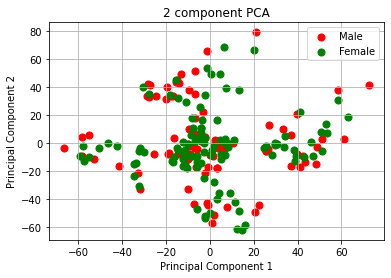

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Male', 'Female']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

Revisando esto podemos concluir que no podemos clasificar las variables separando entre hombre y mujer con base en su edad, ingresos y gastos.